<a href="https://colab.research.google.com/github/Ujjwal-wadhwa/Walmart-Sales-Forecasting/blob/main/Walmart_Time_Series_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Modules**

In [6]:
import tensorflow as tf

In [123]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler

import pickle
from os import path

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

# **Importing Datasets**

In [8]:

data = pd.read_csv('/content/train.csv')
stores = pd.read_csv('/content/stores.csv')
features = pd.read_csv('/content/features.csv')

<ipython-input-8-4fa7e28a52fd>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/train.csv')


**Training Dataset**

In [9]:
data.shape

(309679, 5)

In [10]:
data.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
309674,32,44,2012-08-24,4533.20,False
309675,32,44,2012-08-31,3767.29,False
309676,32,44,2012-09-07,4152.52,True
309677,32,44,2012-09-14,4394.31,False
309678,32,44,2012-09-21,42.00,NaN


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309679 entries, 0 to 309678
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         309679 non-null  int64  
 1   Dept          309679 non-null  int64  
 2   Date          309679 non-null  object 
 3   Weekly_Sales  309679 non-null  float64
 4   IsHoliday     309678 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ MB


**Dataset containing info of Stores**

In [12]:
stores.shape

(45, 3)

In [13]:
stores.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [14]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


**Dataset containing additional data of Stores**

In [15]:
features.shape

(8190, 12)

In [16]:
features.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [17]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


# **Handling missing values of features dataset**

In [18]:
features["CPI"].fillna(features["CPI"].median(),inplace=True)
features["Unemployment"].fillna(features["Unemployment"].median(),inplace=True)

In [19]:
for i in range(1,6):
  features["MarkDown"+str(i)] = features["MarkDown"+str(i)].apply(lambda x: 0 if x < 0 else x)
  features["MarkDown"+str(i)].fillna(value=0,inplace=True)

In [20]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           8190 non-null   float64
 10  Unemployment  8190 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


# **Merging Training Dataset and merged stores-features Dataset**

In [21]:
data = pd.merge(data,stores,on='Store',how='left')

In [22]:
data = pd.merge(data,features,on=['Store','Date'],how='left')

In [23]:
data['Date'] = pd.to_datetime(data['Date'])

In [24]:
data.sort_values(by=['Date'],inplace=True)

In [25]:
data.set_index(data.Date, inplace=True)

In [26]:
data['IsHoliday_x'].isin(data['IsHoliday_y']).all()

False

In [27]:
data.drop(columns='IsHoliday_x',inplace=True)
data.rename(columns={"IsHoliday_y" : "IsHoliday"}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 309679 entries, 2010-02-05 to 2012-10-26
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         309679 non-null  int64         
 1   Dept          309679 non-null  int64         
 2   Date          309679 non-null  datetime64[ns]
 3   Weekly_Sales  309679 non-null  float64       
 4   Type          309679 non-null  object        
 5   Size          309679 non-null  int64         
 6   Temperature   309679 non-null  float64       
 7   Fuel_Price    309679 non-null  float64       
 8   MarkDown1     309679 non-null  float64       
 9   MarkDown2     309679 non-null  float64       
 10  MarkDown3     309679 non-null  float64       
 11  MarkDown4     309679 non-null  float64       
 12  MarkDown5     309679 non-null  float64       
 13  CPI           309679 non-null  float64       
 14  Unemployment  309679 non-null  float64       
 15  I

In [28]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
2010-02-05,14,51,2010-02-05,12.00,A,200898,27.31,2.784,0.0,0.0,0.0,0.0,0.0,181.871190,8.992,False
2010-02-05,26,72,2010-02-05,69498.23,A,152513,9.55,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,8.488,False
2010-02-05,23,33,2010-02-05,10369.10,B,114533,15.25,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,5.892,False
2010-02-05,14,52,2010-02-05,2425.30,A,200898,27.31,2.784,0.0,0.0,0.0,0.0,0.0,181.871190,8.992,False


# **Splitting Date Column**

In [29]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.week

<ipython-input-29-5a11e9e33be7>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['Week'] = data['Date'].dt.week


In [30]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Week
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010,2,5
2010-02-05,14,51,2010-02-05,12.00,A,200898,27.31,2.784,0.0,0.0,0.0,0.0,0.0,181.871190,8.992,False,2010,2,5
2010-02-05,26,72,2010-02-05,69498.23,A,152513,9.55,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,8.488,False,2010,2,5
2010-02-05,23,33,2010-02-05,10369.10,B,114533,15.25,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,5.892,False,2010,2,5
2010-02-05,14,52,2010-02-05,2425.30,A,200898,27.31,2.784,0.0,0.0,0.0,0.0,0.0,181.871190,8.992,False,2010,2,5


# **Outlier Detection and Abnormalities**

**Outliers**

In [31]:
agg_data = data.groupby(['Store', 'Dept']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
agg_data.isnull().sum()

Store      0
Dept       0
max        0
min        0
mean       0
median     0
std       25
dtype: int64

In [32]:
store_data = pd.merge(left=data,right=agg_data,on=['Store', 'Dept'],how ='left')
store_data.dropna(inplace=True)
data = store_data.copy()
del store_data

In [33]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by=['Date'],inplace=True)
data.set_index(data.Date, inplace=True)
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,...,8.106,False,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032
2010-02-05,29,52,2010-02-05,1050.92,B,93638,24.36,2.788,0.0,0.0,...,10.064,False,2010,2,5,1701.59,510.26,959.371469,919.58,244.646500
2010-02-05,5,7,2010-02-05,4401.08,B,34875,39.70,2.572,0.0,0.0,...,6.566,False,2010,2,5,29195.62,3161.84,6124.484336,5005.53,3914.641292
2010-02-05,3,91,2010-02-05,166.19,B,37392,45.71,2.572,0.0,0.0,...,7.368,False,2010,2,5,867.02,65.04,318.685594,302.71,144.413199
2010-02-05,30,60,2010-02-05,915.20,C,42988,39.05,2.572,0.0,0.0,...,8.324,False,2010,2,5,1900.80,325.60,696.250350,642.40,235.916337


In [34]:
data['Total_MarkDown'] = data['MarkDown1']+data['MarkDown2']+data['MarkDown3']+data['MarkDown4']+data['MarkDown5']
data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)

In [35]:
numeric_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown']
data_numeric = data[numeric_col].copy()

In [36]:
data.shape

(309654, 20)

In [37]:
data = data[(np.abs(stats.zscore(data_numeric)) < 2.5).all(axis = 1)]
data.shape

(275903, 20)

**Negative Weekly Sales**

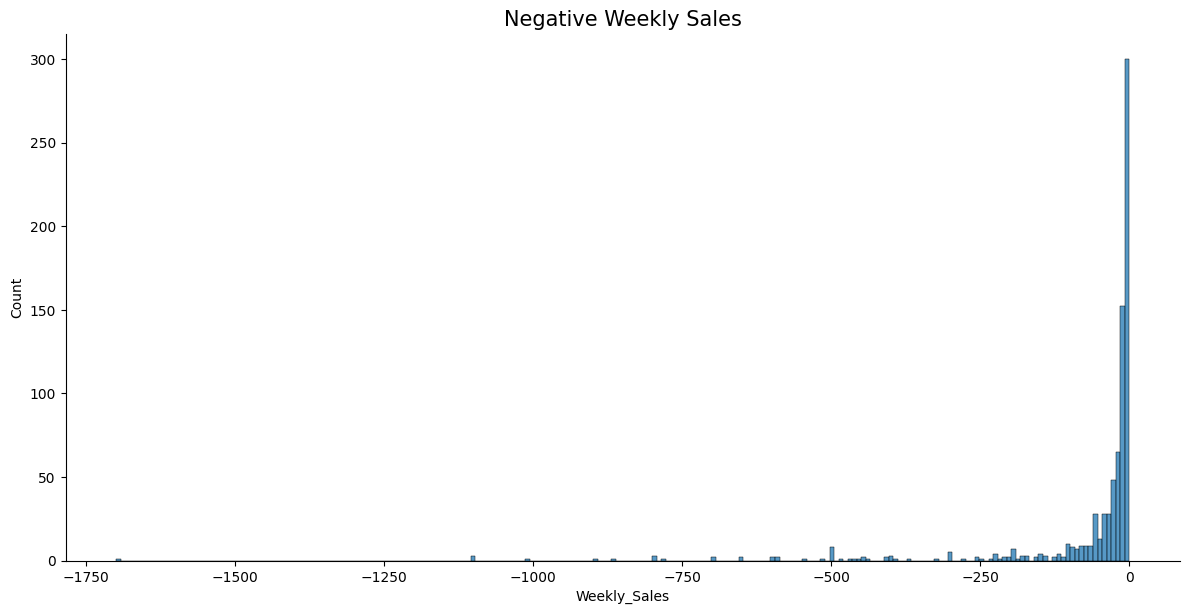

In [38]:
y = data["Weekly_Sales"][data.Weekly_Sales < 0]
sns.displot(y,height=6,aspect=2)
plt.title("Negative Weekly Sales", fontsize=15)
plt.savefig('/content/plots/negative_sales')
plt.show()

In [39]:
data=data[data['Weekly_Sales']>=0]

In [40]:
data.shape

(275095, 20)

In [41]:
data['IsHoliday'] = data['IsHoliday'].astype('int')

<ipython-input-41-8fdcbc3ff8c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['IsHoliday'] = data['IsHoliday'].astype('int')


In [42]:
data

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032,0.00
2010-02-05,29,52,2010-02-05,1050.92,B,93638,24.36,2.788,131.527903,10.064,0,2010,2,5,1701.59,510.26,959.371469,919.58,244.646500,0.00
2010-02-05,5,7,2010-02-05,4401.08,B,34875,39.70,2.572,211.653972,6.566,0,2010,2,5,29195.62,3161.84,6124.484336,5005.53,3914.641292,0.00
2010-02-05,3,91,2010-02-05,166.19,B,37392,45.71,2.572,214.424881,7.368,0,2010,2,5,867.02,65.04,318.685594,302.71,144.413199,0.00
2010-02-05,30,60,2010-02-05,915.20,C,42988,39.05,2.572,210.752605,8.324,0,2010,2,5,1900.80,325.60,696.250350,642.40,235.916337,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,30,1,2012-10-26,12863.85,C,42988,70.50,3.506,223.078337,6.170,0,2012,10,43,22380.12,6951.80,9788.376643,9164.01,2373.532654,520.04
2012-10-26,32,3,2012-10-26,11839.77,A,203007,47.22,3.686,199.219532,7.557,0,2012,10,43,63684.54,8763.66,15472.540140,11469.56,10889.635668,11630.34
2012-10-26,19,55,2012-10-26,10844.43,A,203819,56.49,4.071,138.728161,7.992,0,2012,10,43,72836.92,5447.56,13923.061538,10974.40,10270.823373,8090.93


In [43]:
data.to_csv('/content/preprocessed_walmart_dataset.csv')

# **Data Visuallizations**

**Average Monthly Sales**

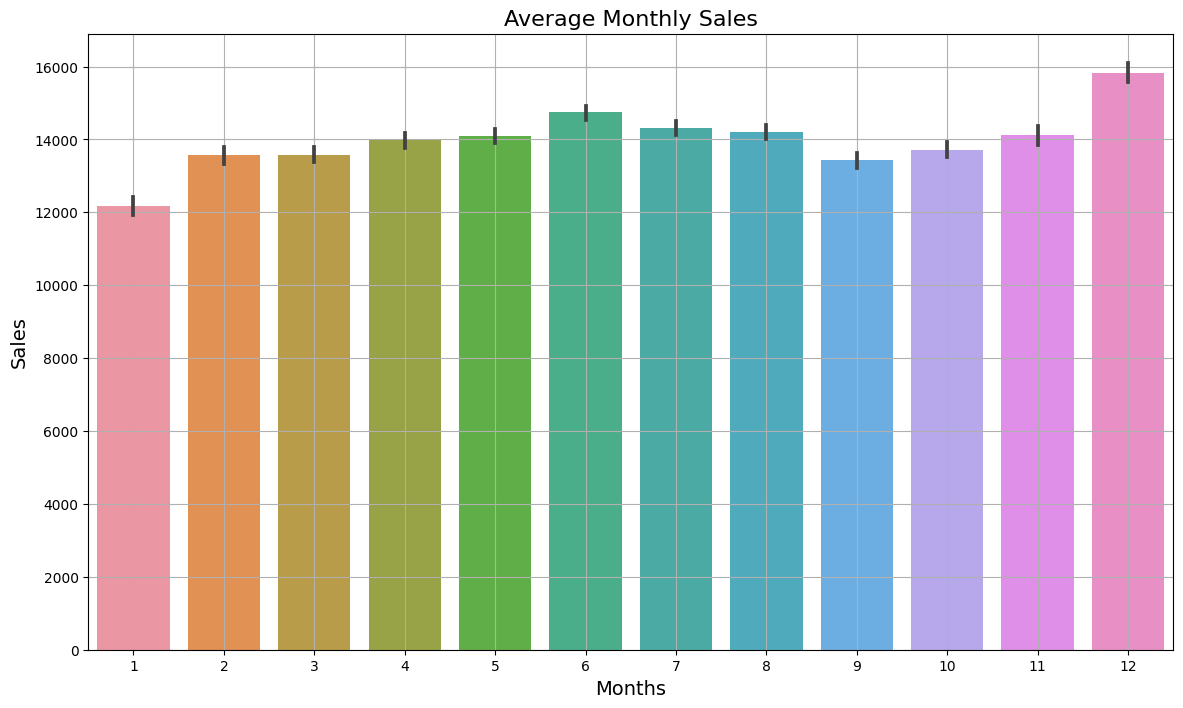

In [44]:
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',data=data)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.savefig('plots/avg_monthly_sales.png')
plt.grid()

**Monthly Sales for Each Year**

In [45]:
data_monthly = pd.crosstab(data["Year"], data["Month"], values=data["Weekly_Sales"],aggfunc='sum')
data_monthly

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,NaN,1.059312e+08,1.067045e+08,1.380337e+08,1.107994e+08,1.150212e+08,1.396757e+08,1.121538e+08,1.058738e+08,1.326475e+08,1.132117e+08,1.535917e+08
2011,89760712.39,1.039903e+08,1.048341e+08,1.358187e+08,1.084965e+08,1.144005e+08,1.383723e+08,1.100920e+08,1.301108e+08,1.085530e+08,8.102240e+07,1.254394e+08
2012,91542708.60,7.473501e+07,1.352790e+08,1.180179e+08,1.183619e+08,1.518994e+08,1.168568e+08,1.304974e+08,1.123273e+08,1.170338e+08,NaN,NaN


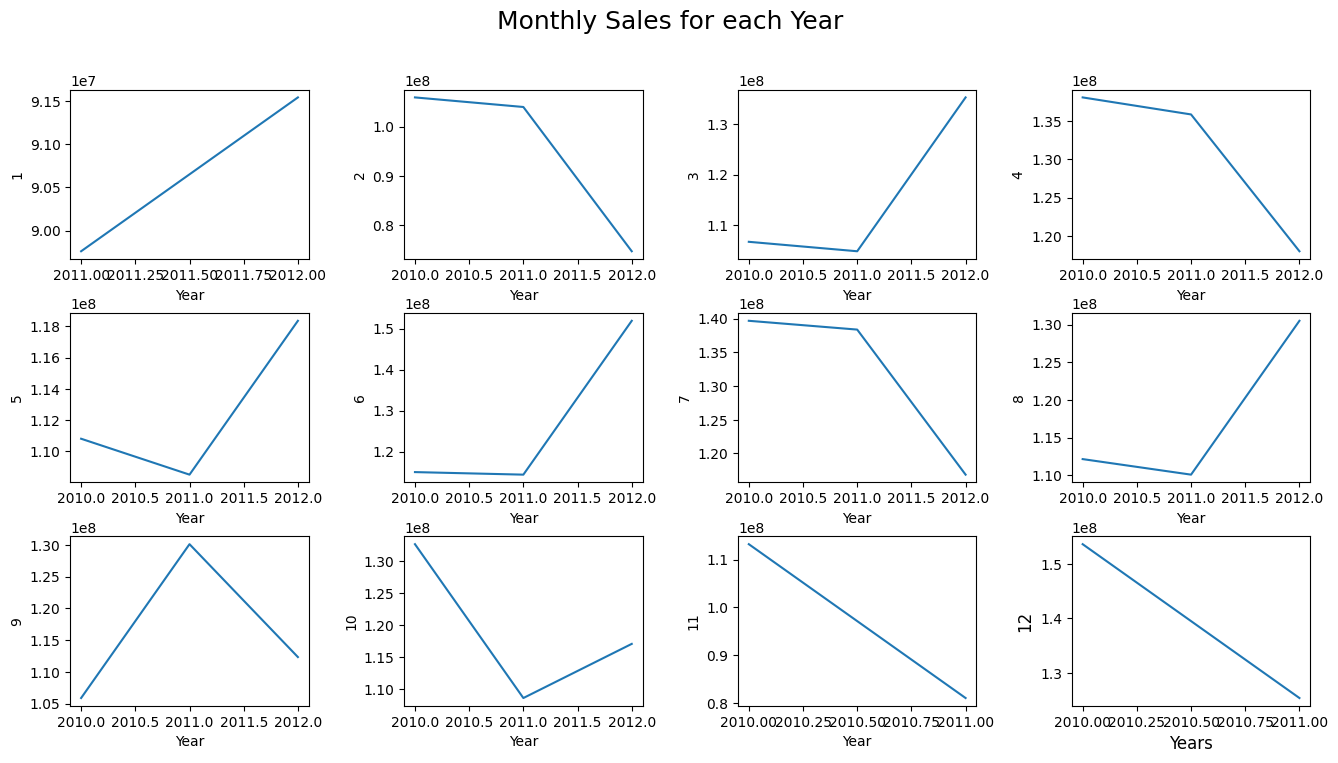

In [46]:
fig, axes = plt.subplots(3,4,figsize=(16,8))
plt.suptitle('Monthly Sales for each Year', fontsize=18)
k=1
for i in range(3):
    for j in range(4):
      sns.lineplot(ax=axes[i,j],data=data_monthly[k])
      plt.subplots_adjust(wspace=0.4,hspace=0.32)
      plt.ylabel(k,fontsize=12)
      plt.xlabel('Years',fontsize=12)
      k+=1

plt.savefig('plots/monthly_sales_every_year.png')
plt.show()

**Average Weekly Sales Store wise**

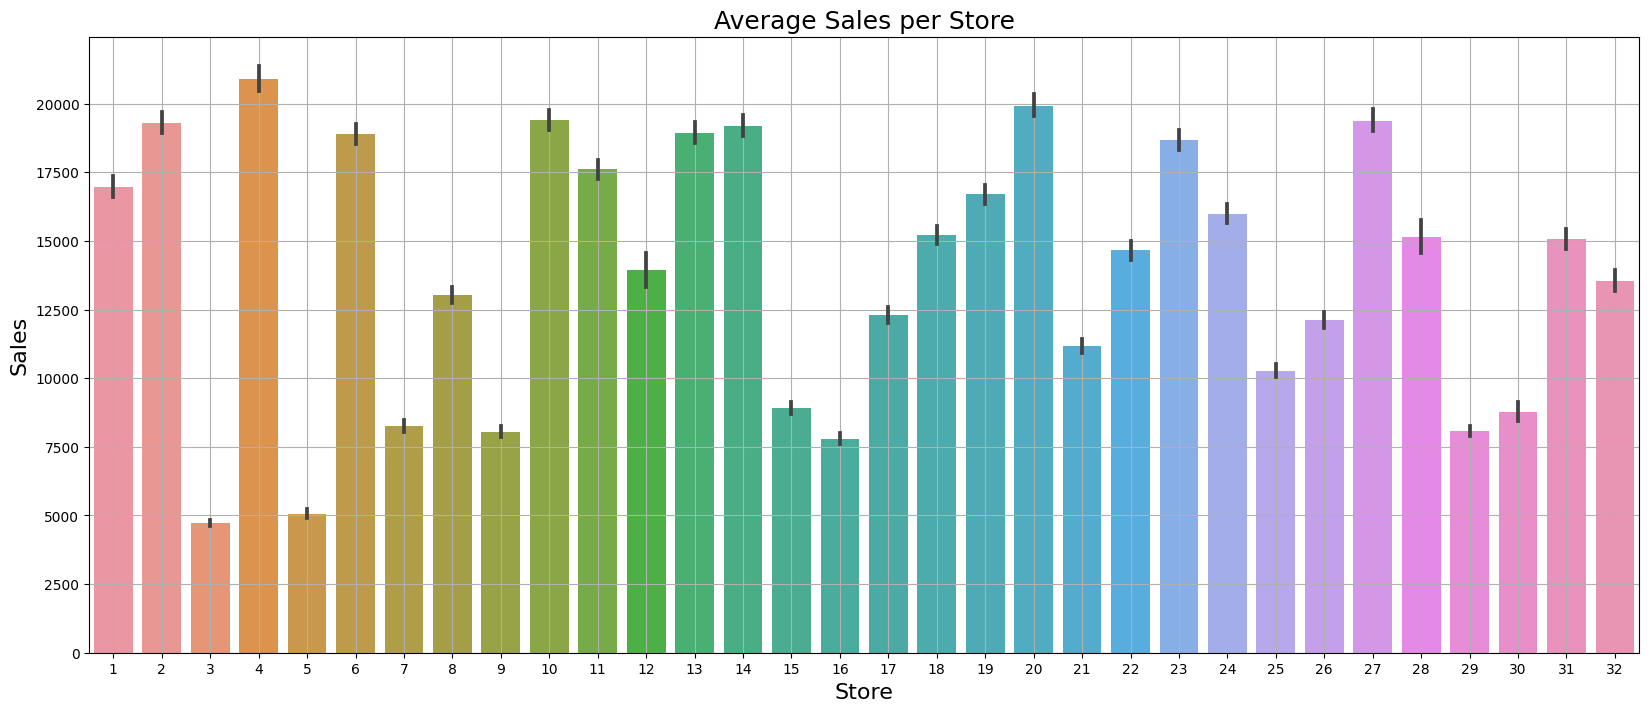

In [47]:
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.savefig('plots/avg_sales_store.png')
plt.show()

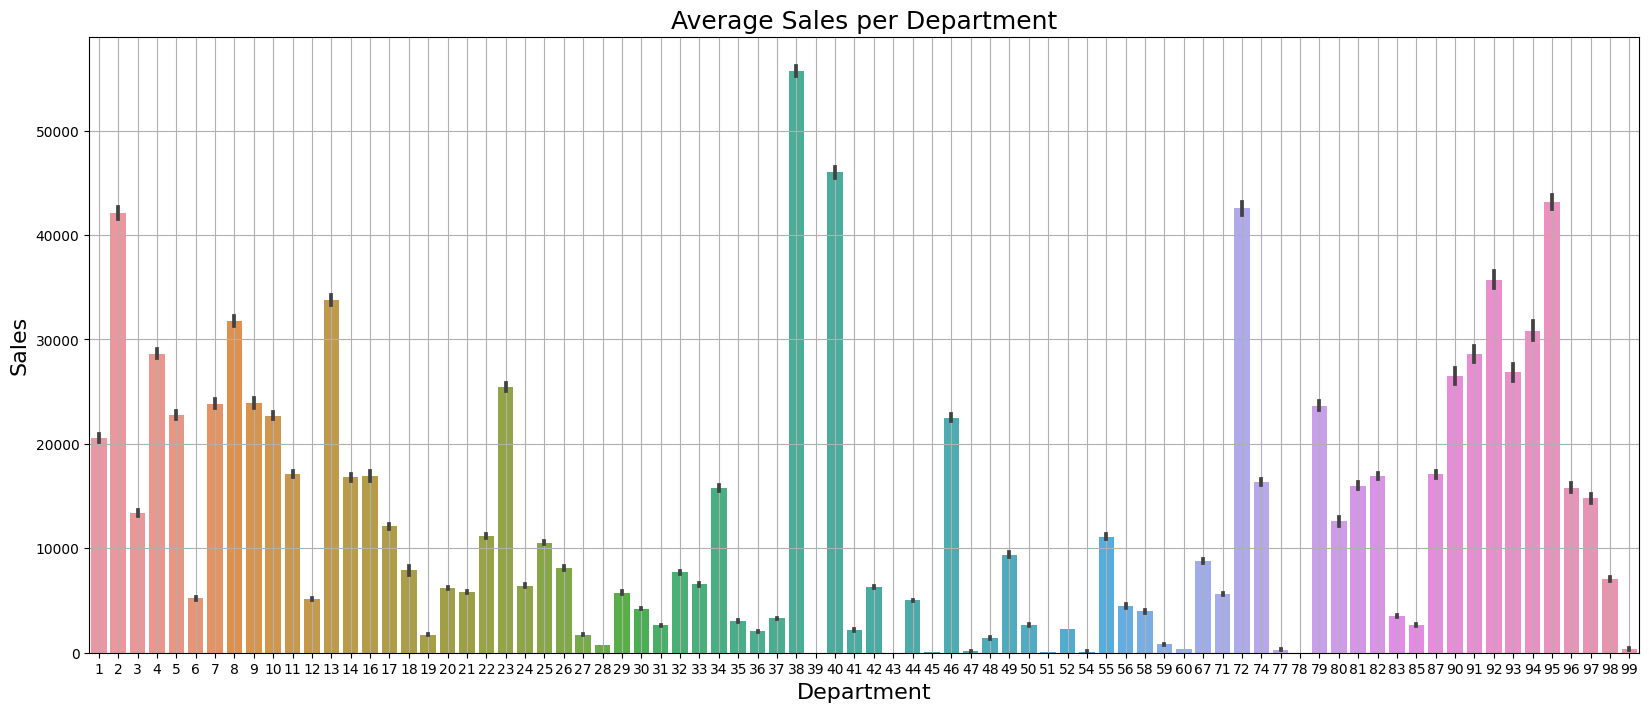

In [48]:
plt.figure(figsize=(20,8))
sns.barplot(x='Dept',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Department', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Department', fontsize=16)
plt.savefig('plots/avg_sales_dept.png')
plt.show()

**Sales Vs Temperature**

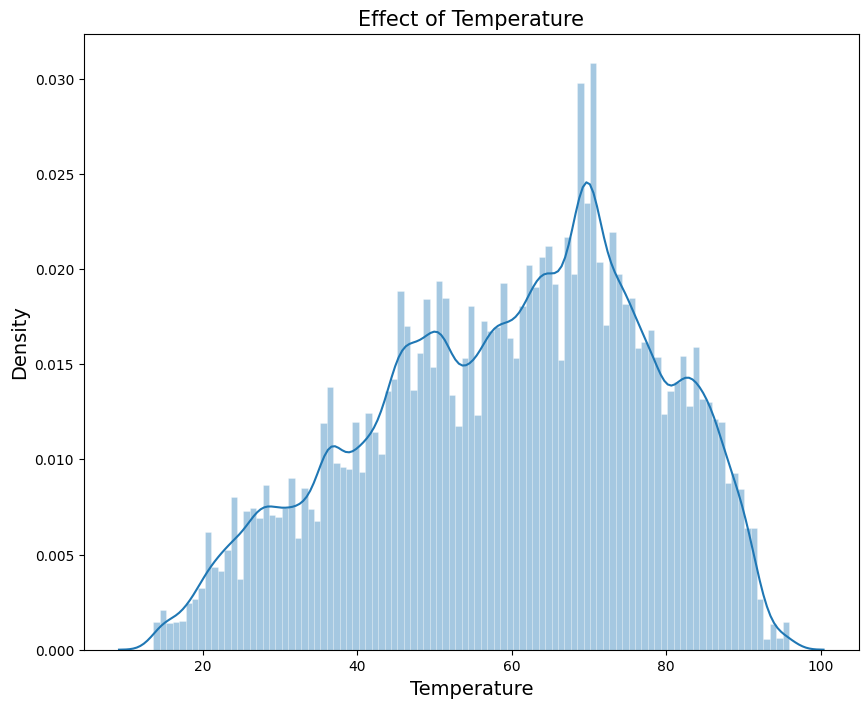

In [49]:
plt.figure(figsize=(10,8))
sns.histplot(data['Temperature'],kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)
plt.title('Effect of Temperature',fontsize=15)
plt.xlabel('Temperature',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.savefig('plots/effect_of_temp.png')
plt.show()

**Holiday Distribution**

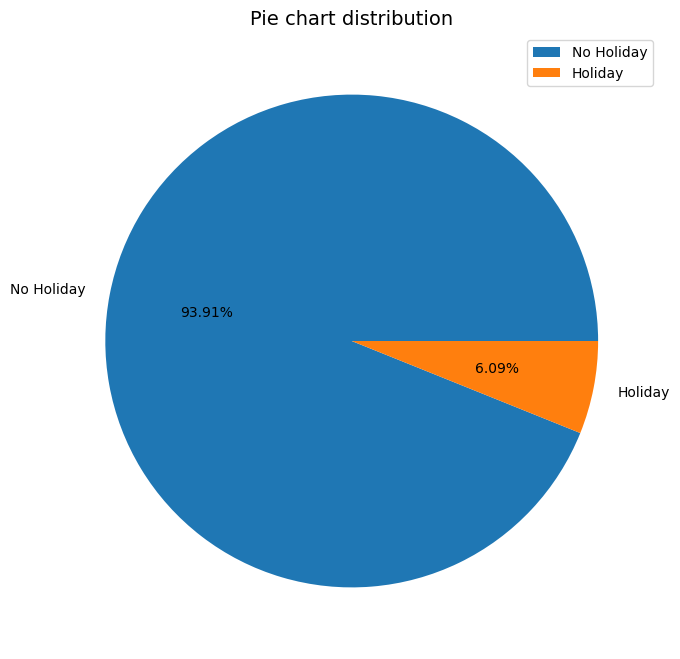

In [50]:
plt.figure(figsize=(8,8))
plt.pie(data['IsHoliday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend()
plt.savefig('plots/holiday_distribution.png')
plt.show()

#**Time Series Decompose**

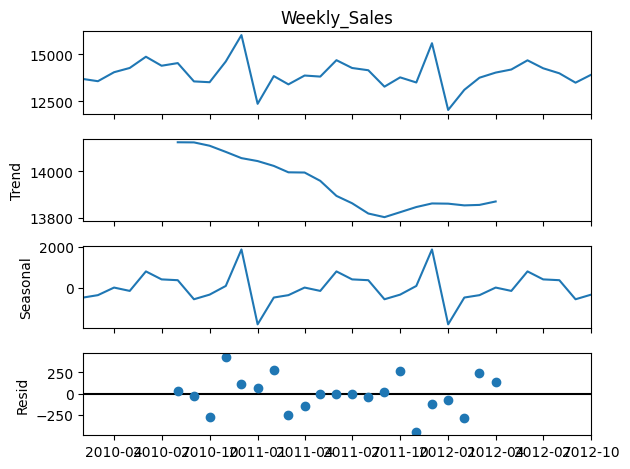

In [51]:
sm.tsa.seasonal_decompose(data['Weekly_Sales'].resample('MS').mean(), model='additive').plot()
plt.savefig('plots/seasonal_decompose.png')
plt.show()

# **One-hot-encoding**

In [52]:
cat_col = ['Store','Dept','Type']
data_cat = data[cat_col].copy()

In [53]:
data_cat.tail()

,Store,Dept,Type
Date,,,
2012-10-26,30,1,C
2012-10-26,32,3,A
2012-10-26,19,55,A
2012-10-26,11,35,A
2012-10-26,16,20,B


In [54]:
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [55]:
data_cat.head()

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
data.shape

(275095, 20)

In [57]:
data = pd.concat([data, data_cat],axis=1)

In [58]:
data.shape

(275095, 135)

In [59]:
data.drop(columns=cat_col,inplace=True)

In [60]:
data.drop(columns=['Date'],inplace=True)

In [61]:
data.shape

(275095, 131)

# **Data Normalization**

In [62]:
num_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown','max','min','mean','median','std']

In [63]:
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [64]:
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,1050.92,93638,24.36,2.788,131.527903,10.064,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,4401.08,34875,39.70,2.572,211.653972,6.566,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,166.19,37392,45.71,2.572,214.424881,7.368,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,915.20,42988,39.05,2.572,210.752605,8.324,0,2010,2,5,...,0,0,0,0,0,0,0,0,0,1


In [65]:
data = normalization(data.copy(),num_col)

In [66]:
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.323710,0.630267,0.348487,0.029683,0.840500,0.508787,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0.013649,0.318073,0.130303,0.140225,0.054008,0.744463,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0.057160,0.000000,0.316762,0.029683,0.846011,0.323423,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0.002158,0.013624,0.389814,0.029683,0.873400,0.419957,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0.011886,0.043914,0.308861,0.029683,0.837102,0.535026,0,2010,2,5,...,0,0,0,0,0,0,0,0,0,1


# **Correlation between features of dataset**

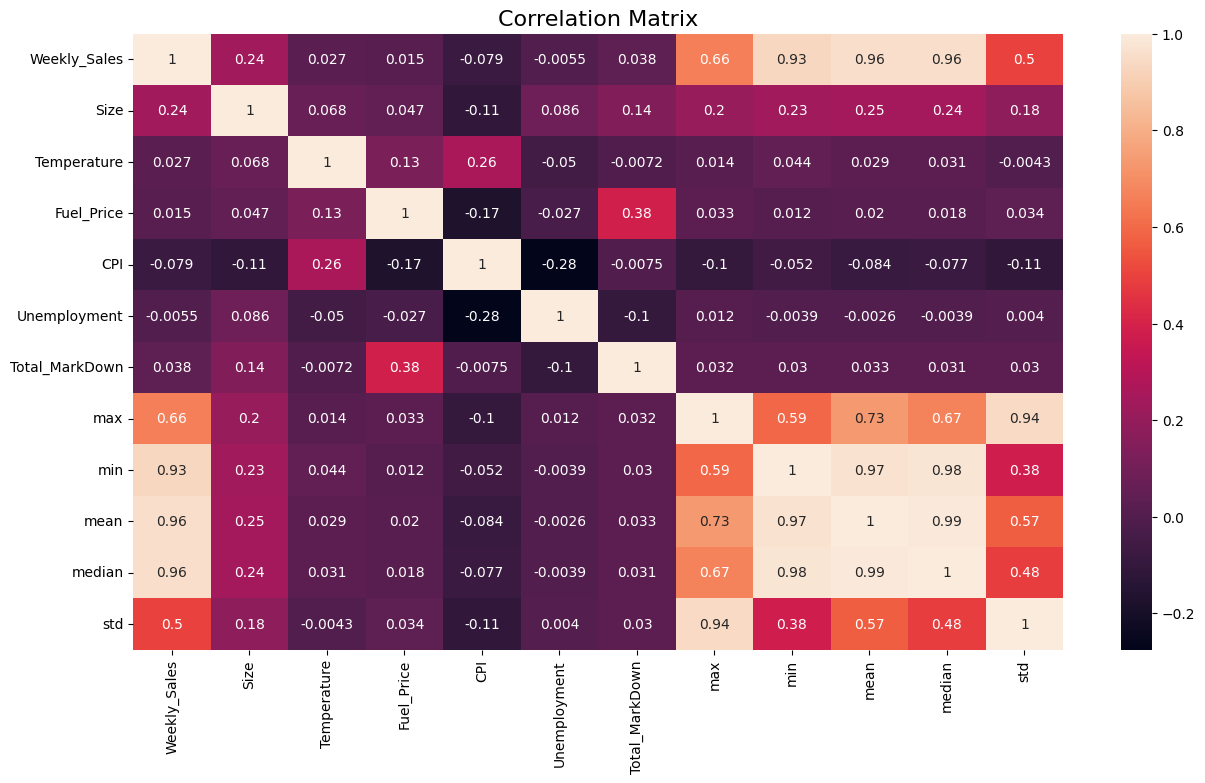

In [67]:
plt.figure(figsize=(15,8))
corr = data[num_col].corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix',fontsize=16)
plt.savefig('plots/correlation_matrix.png')
plt.show()

# **Recursive Feature Elimination**

In [68]:
feature_col = data.columns.difference(['Weekly_Sales'])
feature_col

Index(['CPI', 'Dept_1', 'Dept_10', 'Dept_11', 'Dept_12', 'Dept_13', 'Dept_14',
       'Dept_16', 'Dept_17', 'Dept_18',
       ...
       'Type_B', 'Type_C', 'Unemployment', 'Week', 'Year', 'max', 'mean',
       'median', 'min', 'std'],
      dtype='object', length=130)

In [69]:
'''
param_grid={'n_estimators':np.arange(10,25)}
tree=GridSearchCV(RandomForestRegressor(oob_score=False,warm_start=True),param_grid,cv=5)
tree.fit(data_train[feature_col],data_train['Weekly_Sales'])
'''

"\nparam_grid={'n_estimators':np.arange(10,25)}\ntree=GridSearchCV(RandomForestRegressor(oob_score=False,warm_start=True),param_grid,cv=5)\ntree.fit(data_train[feature_col],data_train['Weekly_Sales'])\n"

In [70]:
#tree.best_params_

In [71]:
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=23)
radm_clf.fit(data[feature_col], data['Weekly_Sales'])

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=23, oob_score=True)

In [72]:
pkl_filename = "/content/models/feature_elim_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(radm_clf, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


In [73]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame(columns = ['rank', 'feature', 'importance'])

for f in range(data[feature_col].shape[1]):
    feature_rank.loc[f] = [f+1,
                           data[feature_col].columns[indices[f]],
                           radm_clf.feature_importances_[indices[f]]]

feature_rank

,rank,feature,importance
0,1,mean,7.313269e-01
1,2,median,1.931813e-01
2,3,Week,2.087793e-02
3,4,Temperature,9.240615e-03
4,5,max,6.692674e-03
...,...,...,...
125,126,Dept_51,2.290964e-10
126,127,Dept_45,1.681173e-10
127,128,Dept_78,2.395989e-12
128,129,Dept_39,1.423872e-14


In [74]:
x=feature_rank.loc[0:22,['feature']]
x=x['feature'].tolist()
print(x)

['mean', 'median', 'Week', 'Temperature', 'max', 'CPI', 'min', 'Fuel_Price', 'std', 'Unemployment', 'Month', 'Total_MarkDown', 'Dept_16', 'IsHoliday', 'Dept_3', 'Dept_18', 'Size', 'Dept_9', 'Dept_1', 'Dept_11', 'Year', 'Dept_5', 'Dept_56']


In [75]:
X = data[x]
Y = data['Weekly_Sales']

In [76]:
data = pd.concat([X,Y],axis=1)

In [77]:
data

,mean,median,Week,Temperature,max,CPI,min,Fuel_Price,std,Unemployment,...,Dept_3,Dept_18,Size,Dept_9,Dept_1,Dept_11,Year,Dept_5,Dept_56,Weekly_Sales
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.208157,0.172517,5,0.348487,0.121418,0.840500,0.239991,0.029683,0.189249,0.508787,...,0,0,0.630267,0,1,0,2010,0,0,0.323710
2010-02-05,0.009896,0.009018,5,0.130303,0.003587,0.054008,0.067589,0.140225,0.004698,0.744463,...,0,0,0.318073,0,0,0,2010,0,0,0.013649
2010-02-05,0.057407,0.046941,5,0.316762,0.061551,0.846011,0.100178,0.029683,0.075179,0.323423,...,0,0,0.000000,0,0,0,2010,0,0,0.057160
2010-02-05,0.004003,0.003292,5,0.389814,0.001828,0.873400,0.062117,0.029683,0.002773,0.419957,...,0,0,0.013624,0,0,0,2010,0,0,0.002158
2010-02-05,0.007476,0.006445,5,0.308861,0.004007,0.837102,0.065319,0.029683,0.004531,0.535026,...,0,0,0.043914,0,0,0,2010,0,0,0.011886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,0.091108,0.085537,43,0.691139,0.047183,0.958935,0.146759,0.507677,0.045583,0.275758,...,0,0,0.043914,0,1,0,2012,0,0,0.167071
2012-10-26,0.143393,0.106936,43,0.408168,0.134262,0.723104,0.169028,0.599795,0.209132,0.442706,...,1,0,0.910066,0,0,0,2012,0,0,0.153770
2012-10-26,0.129141,0.102340,43,0.520846,0.153557,0.125179,0.128271,0.796827,0.197248,0.495065,...,0,0,0.914461,0,0,0,2012,0,0,0.140843


In [79]:
data.to_csv('/content/final_data.csv')

# **Data Splitted into Training, Validation, Test**

In [80]:
X = data.drop(['Weekly_Sales'],axis=1)
Y = data.Weekly_Sales

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

# **Linear Regression Model**

In [83]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [84]:
lr_acc = lr.score(X_test,y_test)*100
print("Linear Regressor Accuracy - ",lr_acc)

Linear Regressor Accuracy -  92.2277490115573


In [85]:
y_pred = lr.predict(X_test)

In [86]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.03054802069612231
MSE 0.003454059372029377
RMSE 0.05877124613303156
R2 0.922279477560643


In [88]:
lr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_df.to_csv('/content/predictions/lr_real_pred.csv')
lr_df

,Actual,Predicted
Date,,
2012-05-11,0.024288,0.026346
2011-06-24,0.200477,0.249569
2011-04-01,0.017263,0.022075
2012-09-14,0.070633,0.107294
2011-07-22,0.071151,0.063629
...,...,...
2012-10-05,0.055021,0.056847
2012-01-20,0.915821,0.853042
2011-08-12,0.762257,0.660590


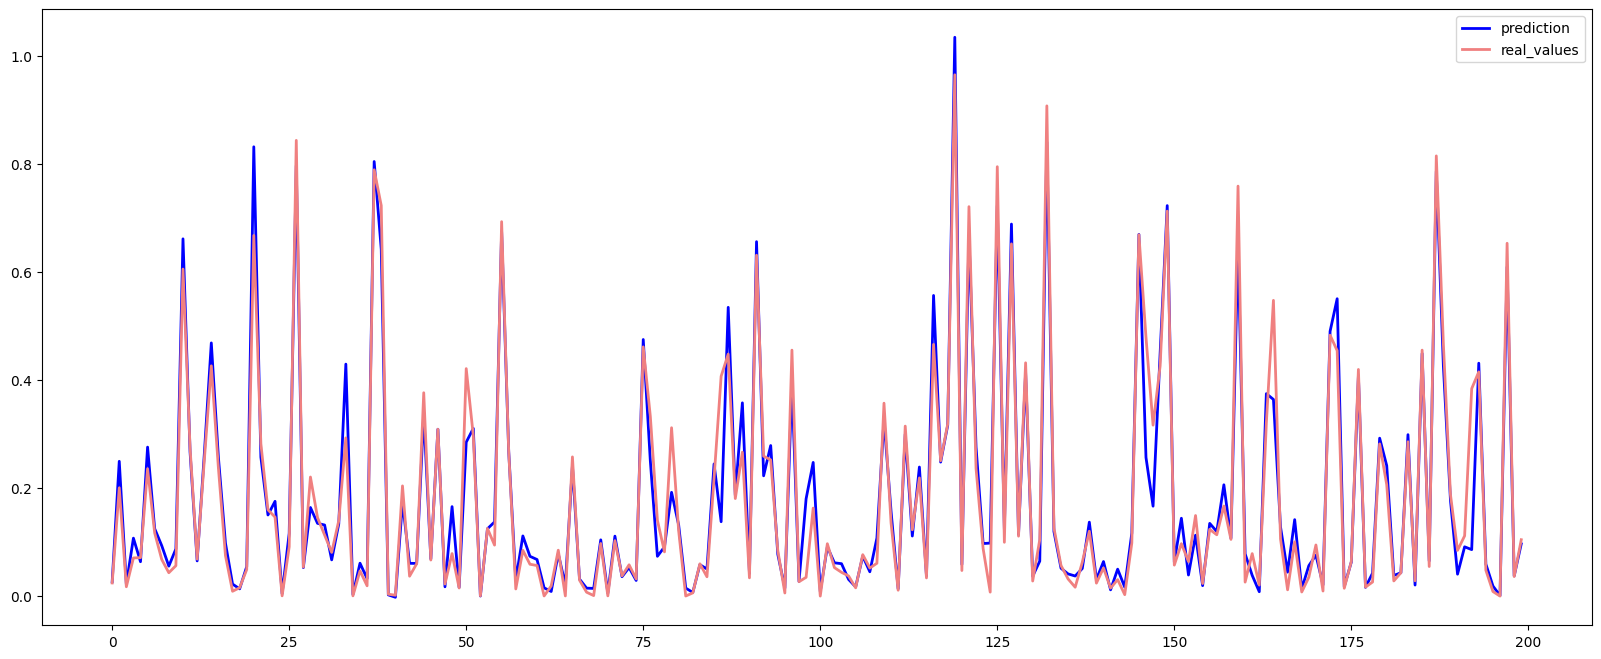

In [89]:
plt.figure(figsize=(20,8))
plt.plot(lr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.savefig('plots/lr_real_pred.png')
plt.show()

**Saving trained model**

In [92]:
pkl_filename = "/content/models/linear_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lr, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


# **Random Forest Regressor Model**

In [93]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [94]:
rf_acc = rf.score(X_test,y_test)*100
print("Random Forest Regressor Accuracy - ",rf_acc)

Random Forest Regressor Accuracy -  97.84327986037361


In [95]:
y_pred = rf.predict(X_test)

In [96]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.015821131118387833
MSE 0.0009584661409157125
RMSE 0.030959104329998186
R2 0.9784334965362006


In [98]:
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_df.to_csv('/content/predictions/rf_real_pred.csv')
rf_df

,Actual,Predicted
Date,,
2012-05-11,0.024288,0.022092
2011-06-24,0.200477,0.202882
2011-04-01,0.017263,0.017909
2012-09-14,0.070633,0.088625
2011-07-22,0.071151,0.064384
...,...,...
2012-10-05,0.055021,0.045893
2012-01-20,0.915821,0.920478
2011-08-12,0.762257,0.739961


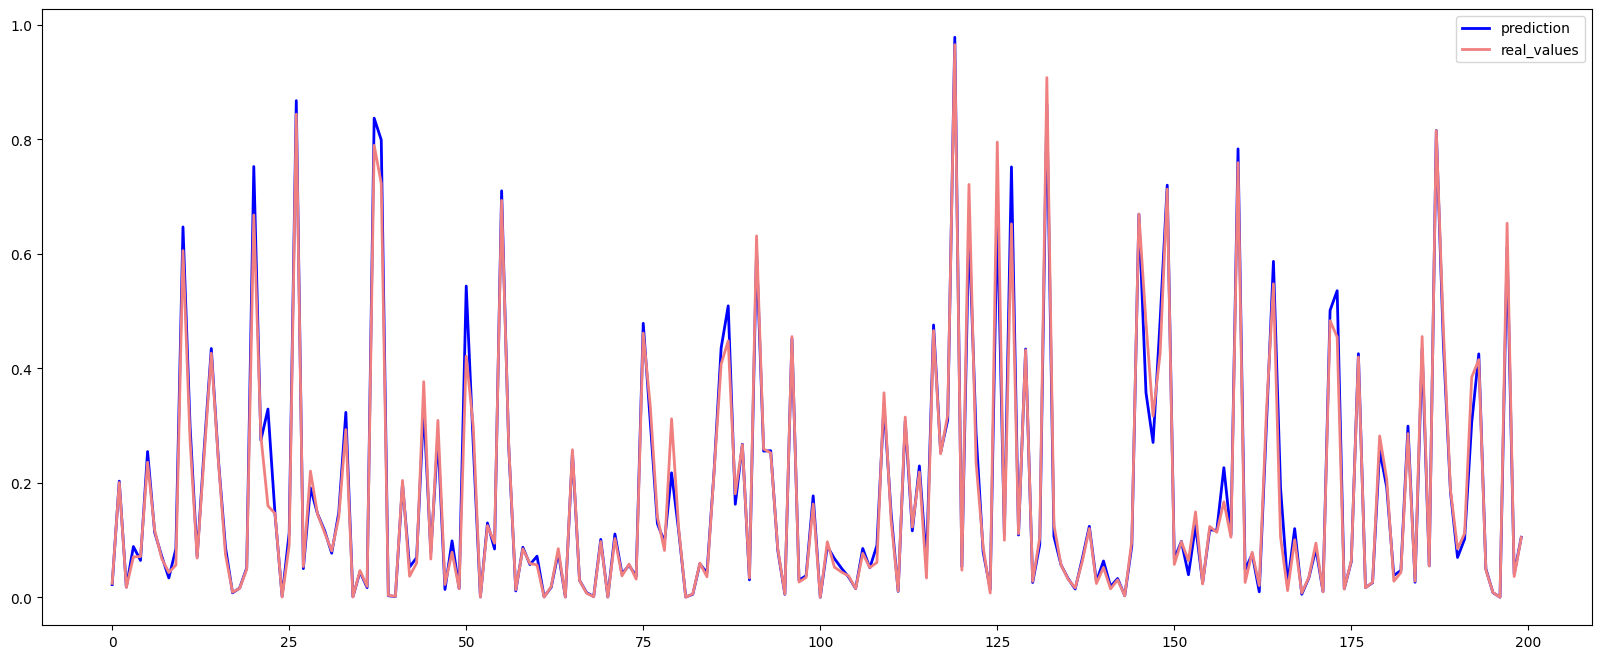

In [99]:
plt.figure(figsize=(20,8))
plt.plot(rf.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.savefig('plots/rf_real_pred.png')
plt.show()

**Saving trained model**

In [100]:
pkl_filename = "/content/models/randomforest_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(rf, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


# **K Neighbors Regressor Model**

In [101]:
knn = KNeighborsRegressor(n_neighbors = 1,weights = 'uniform')
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [102]:
knn_acc = knn.score(X_test, y_test)*100
print("KNeigbhbors Regressor Accuracy - ",knn_acc)

KNeigbhbors Regressor Accuracy -  91.5420572722473


In [103]:
y_pred = knn.predict(X_test)

In [104]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.03484959568388976
MSE 0.003758787047706424
RMSE 0.06130894753383411
R2 0.9156256077600888


In [106]:
knn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
knn_df.to_csv('predictions/knn_real_pred.csv')
knn_df

,Actual,Predicted
Date,,
2012-05-11,0.024288,0.015033
2011-06-24,0.200477,0.147769
2011-04-01,0.017263,0.017449
2012-09-14,0.070633,0.087508
2011-07-22,0.071151,0.069739
...,...,...
2012-10-05,0.055021,0.055930
2012-01-20,0.915821,0.893017
2011-08-12,0.762257,0.703192


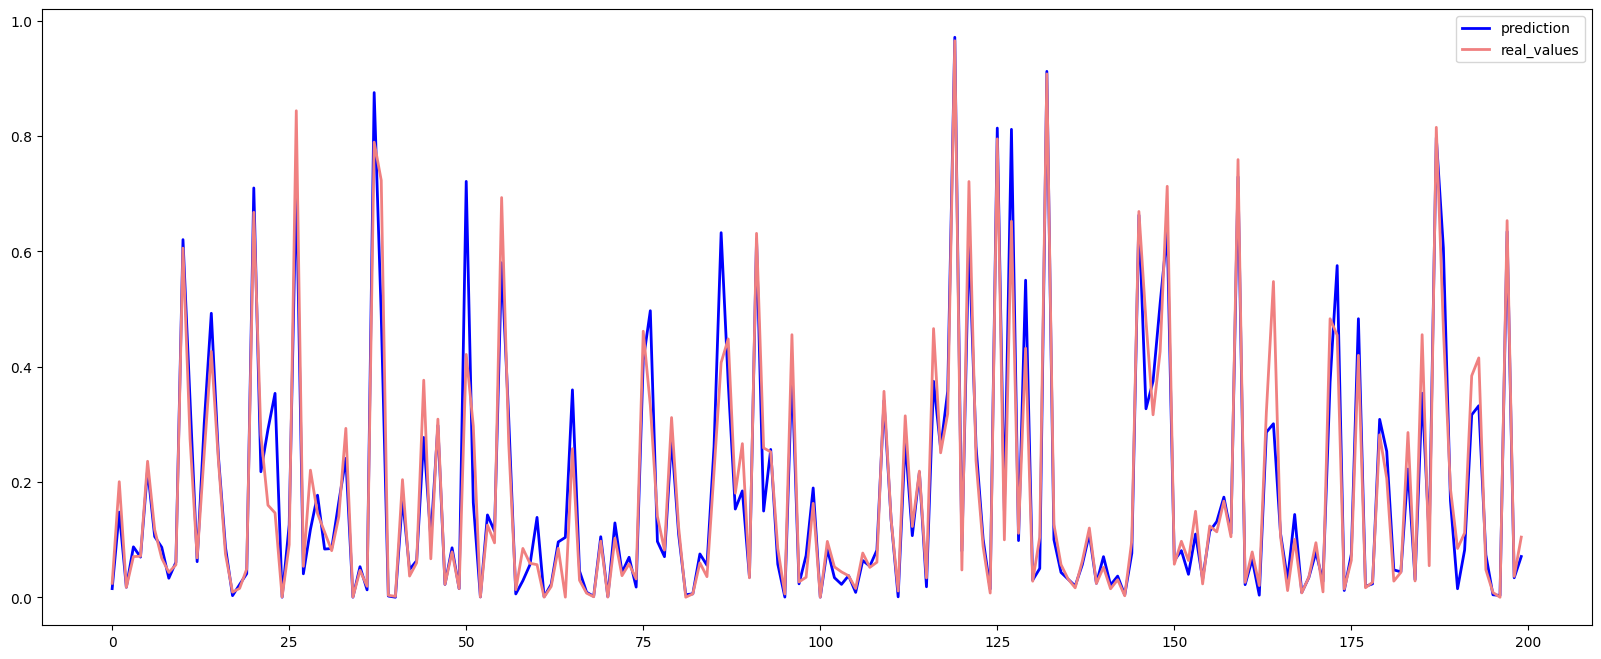

In [107]:
plt.figure(figsize=(20,8))
plt.plot(knn.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.savefig('plots/knn_real_pred.png')
plt.show()

**Saving trained model**

In [108]:
pkl_filename = "/content/models/knn_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(knn, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


# **XGboost Model**

In [109]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [110]:
xgb_acc = xgbr.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgb_acc)

XGBoost Regressor Accuracy -  97.34082820361422


In [111]:
y_pred = xgbr.predict(X_test)

In [112]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.01989918211685131
MSE 0.0011817602492251562
RMSE 0.03437673994469453
R2 0.9734086040892282


In [113]:
xgb_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
xgb_df.to_csv('/content/predictions/xgb_real_pred.csv')
xgb_df

,Actual,Predicted
Date,,
2012-05-11,0.024288,0.019569
2011-06-24,0.200477,0.215968
2011-04-01,0.017263,0.018396
2012-09-14,0.070633,0.072324
2011-07-22,0.071151,0.060825
...,...,...
2012-10-05,0.055021,0.048596
2012-01-20,0.915821,0.862425
2011-08-12,0.762257,0.683574


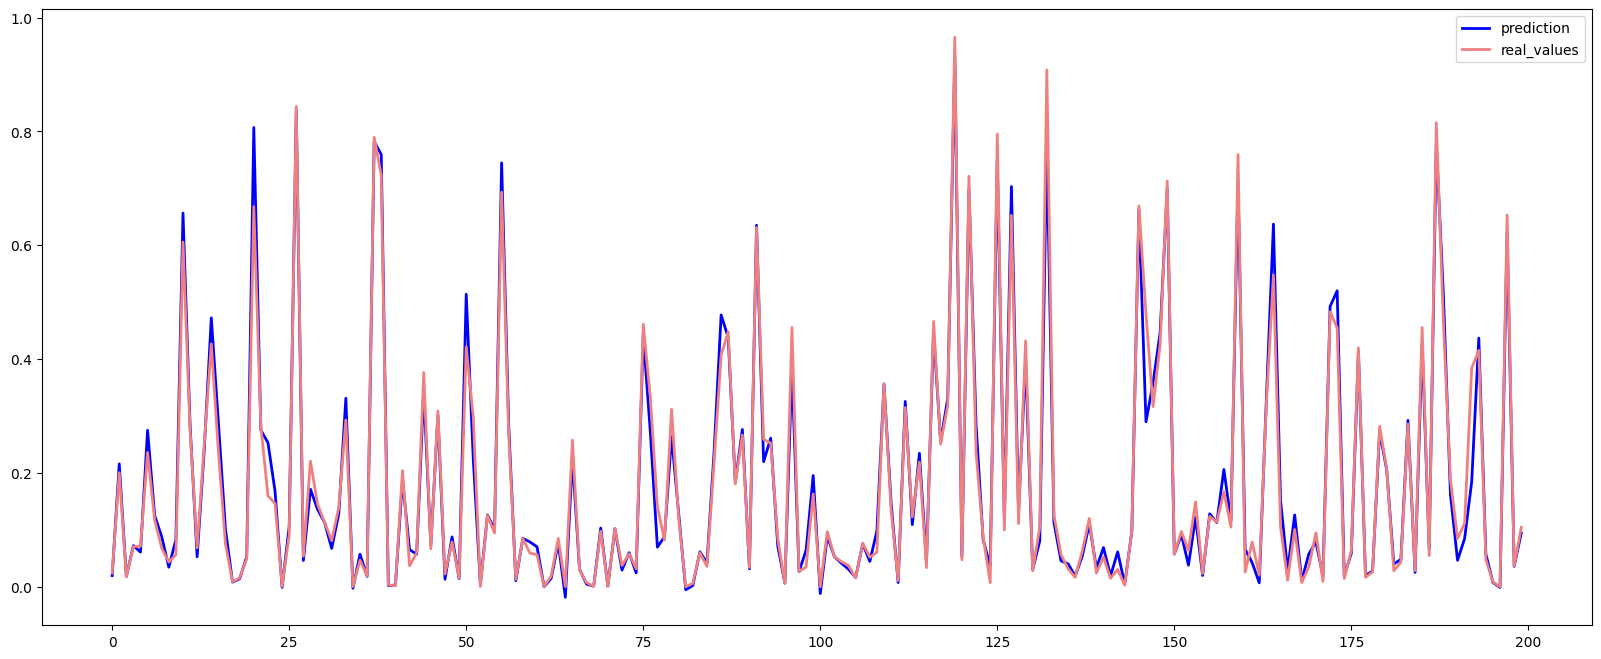

In [114]:
plt.figure(figsize=(20,8))
plt.plot(xgbr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.savefig('plots/xgb_real_pred.png')
plt.show()

**Saving trained model**

In [115]:
pkl_filename = "/content/models/xgboost_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(xgbr, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


# **Custom Deep Learning Neural Network**

In [124]:
# Custom wrapper class for Keras models
class KerasRegressorWithHistory(BaseEstimator, RegressorMixin):
    def __init__(self, build_fn, epochs=100, batch_size=32):
        self.build_fn = build_fn
        self.epochs = epochs
        self.batch_size = batch_size

    def fit(self, X, y):
        X, y = check_X_y(X, y, multi_output=True)
        self.model = self.build_fn()
        history = self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, validation_split=0.2)
        self.history = history.history
        return self

    def predict(self, X):
        check_is_fitted(self, 'model')
        X = check_array(X)
        return self.model.predict(X)

# Create a function to build your Keras model
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_absolute_error', optimizer='adam')
    return model

In [125]:
# Use the custom wrapper
estimator_model = KerasRegressorWithHistory(build_fn=create_model, epochs=100, batch_size=5000)
estimator_model.fit(X_train, y_train)

Epoch 1/100
36/36 [==============================] - 2s 7ms/step - loss: 0.4593 - val_loss: 0.2005
Epoch 2/100
36/36 [==============================] - 0s 5ms/step - loss: 0.1509 - val_loss: 0.1434
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: 0.1393 - val_loss: 0.1381
Epoch 4/100
36/36 [==============================] - 0s 5ms/step - loss: 0.1355 - val_loss: 0.1344
Epoch 5/100
36/36 [==============================] - 0s 5ms/step - loss: 0.1323 - val_loss: 0.1311
Epoch 6/100
36/36 [==============================] - 0s 4ms/step - loss: 0.1319 - val_loss: 0.2126
Epoch 7/100
36/36 [==============================] - 0s 5ms/step - loss: 0.1355 - val_loss: 0.1235
Epoch 8/100
36/36 [==============================] - 0s 5ms/step - loss: 0.1216 - val_loss: 0.1226
Epoch 9/100
36/36 [==============================] - 0s 4ms/step - loss: 0.1522 - val_loss: 0.1548
Epoch 10/100
36/36 [==============================] - 0s 5ms/step - loss: 0.1434 - val_loss: 0.1159
Epoch 11/

KerasRegressorWithHistory(batch_size=5000,
                          build_fn=<function create_model at 0x7a78e850d5a0>)

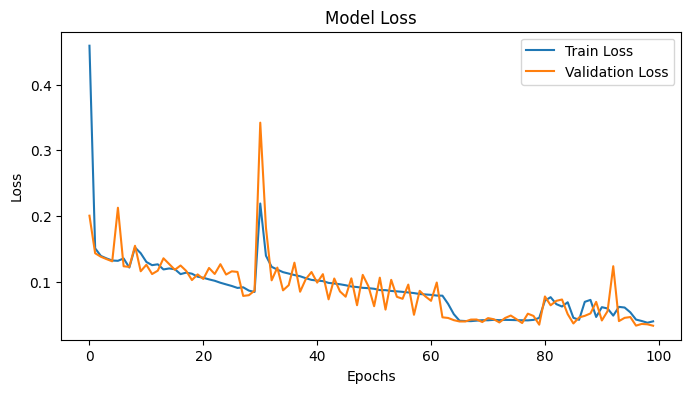

In [126]:
# Plot the loss
plt.figure(figsize=(8, 4))
plt.plot(estimator_model.history['loss'], label='Train Loss')
plt.plot(estimator_model.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.savefig('plots/dnn_loss.png')
plt.show()


In [127]:
dnn_acc = metrics.r2_score(y_pred, y_test)*100
print("Deep Neural Network accuracy - ",dnn_acc)

Deep Neural Network accuracy -  97.24616480025632


In [128]:
y_pred = estimator_model.predict(X_test)

1720/1720 [==============================] - 3s 2ms/step


In [129]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.032657577531778614
MSE 0.004067105727155805
RMSE 0.06377386398169554
R2 0.9120473513777622


In [134]:

y_test = y_test.flatten()

y_pred = y_pred.flatten()

dnn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dnn_df.to_csv('predictions/dnn_real_pred.csv')
dnn_df

,Actual,Predicted
0,0.024288,0.015344
1,0.200477,0.207168
2,0.017263,0.012584
3,0.070633,0.075334
4,0.071151,0.052029
...,...,...
55014,0.055021,0.043225
55015,0.915821,0.804525
55016,0.762257,0.628717
55017,0.137242,0.140962


4/4 [==============================] - 0s 3ms/step


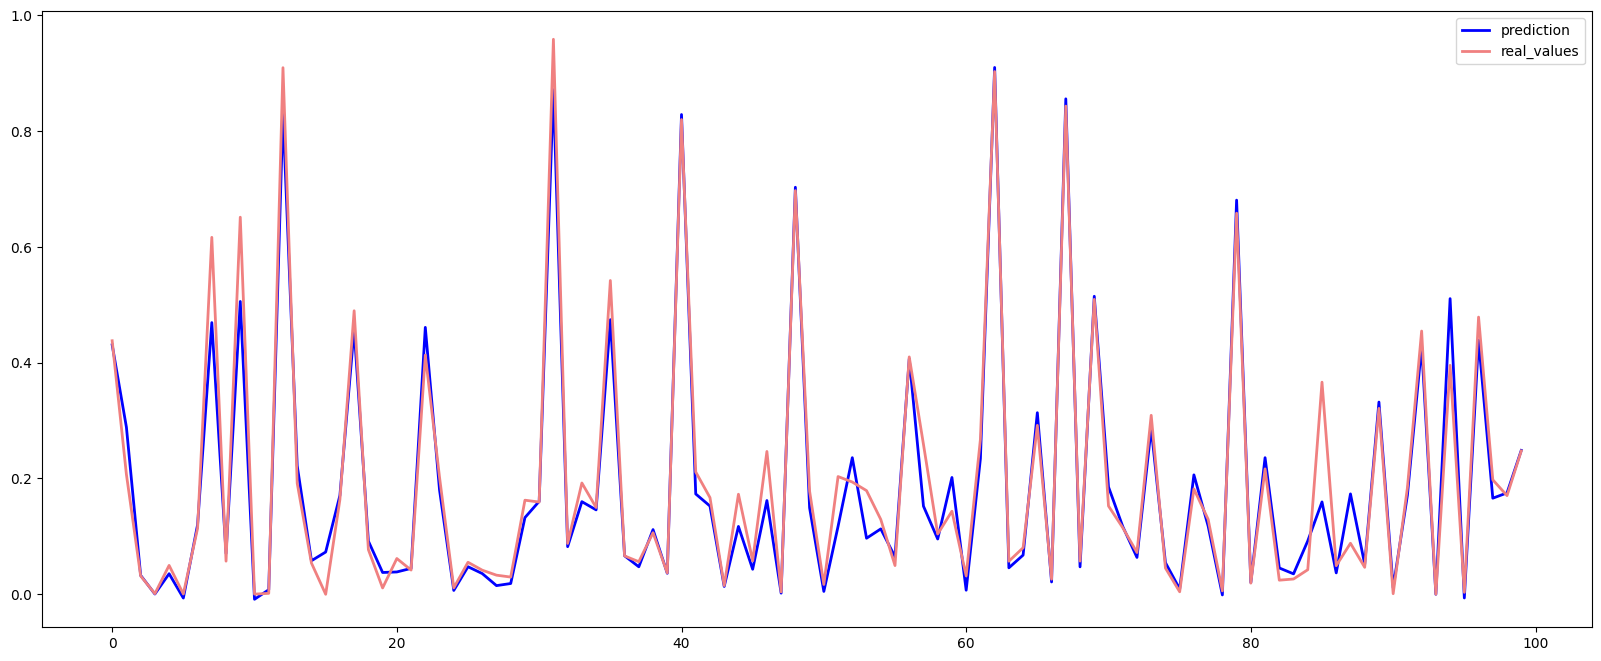

In [140]:
plt.figure(figsize=(20, 8))
plt.plot(estimator_model.predict(X_test[200:300]), label="prediction", linewidth=2.0, color='blue')
plt.plot(y_test[200:300], label="real_values", linewidth=2.0, color='lightcoral')
plt.savefig('plots/dnn_real_pred.png')
plt.legend(loc="best")


In [141]:
filepath = 'models/dnn_regressor.json'
weightspath = 'models/dnn_regressor.h5'
if (not path.isfile(filepath)):
  # serialize model to JSON
  model_json = estimator_model.model.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(model_json)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


# **Comparing Models**

In [142]:
acc = {'model':['lr_acc','rf_acc','knn_acc','xgb_acc','dnn_acc'],'accuracy':[lr_acc,rf_acc,knn_acc,xgb_acc,dnn_acc]}

In [143]:
acc_df = pd.DataFrame(acc)
acc_df

,model,accuracy
0,lr_acc,92.227749
1,rf_acc,97.843280
2,knn_acc,91.542057
3,xgb_acc,97.340828
4,dnn_acc,97.246165


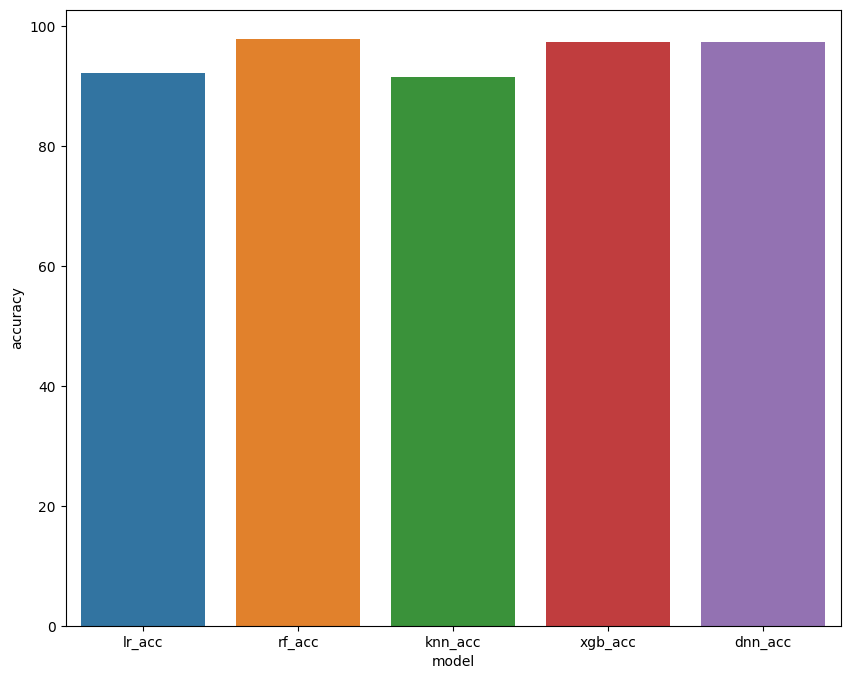

In [144]:
plt.figure(figsize=(10,8))
sns.barplot(x='model',y='accuracy',data=acc_df)
plt.savefig('plots/compared_models.png')
plt.show()